# Coursera Capstone Project Final

In [1]:
# import libraries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
# import  dataset of all Boroughs and their neighborhoods that exists
url='https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins'
df=pd.read_html(url)

df[1].head()
df1=df[1]
df2=df1.drop(df1.columns[[0,4,5,6,7]], axis=1)
df2

,Bezirk,Ortsteile,Flächein km²
0,Mitte,0101 Mitte0102 Moabit0103 Hansaviertel0104 Tie...,3947
1,Friedrichshain-Kreuzberg,0201 Friedrichshain0202 Kreuzberg,2016
2,Pankow,0301 Prenzlauer Berg0302 Weißensee0303 Blanken...,10301
3,Charlottenburg-Wilmersdorf,0401 Charlottenburg0402 Wilmersdorf0403 Schmar...,6472
4,Spandau,0501 Spandau0502 Haselhorst0503 Siemensstadt05...,9191
5,Steglitz-Zehlendorf,0601 Steglitz0602 Lichterfelde0603 Lankwitz060...,10250
6,Tempelhof-Schöneberg,0701 Schöneberg0702 Friedenau0703 Tempelhof070...,5309
7,Neukölln,0801 Neukölln0802 Britz0803 Buckow0804 Rudow08...,4493
8,Treptow-Köpenick,0901 Alt-Treptow0902 Plänterwald0903 Baumschul...,16842
9,Marzahn-Hellersdorf,1001 Marzahn1002 Biesdorf1003 Kaulsdorf1004 Ma...,6174


In [3]:
# using geopy to allocate latitude and longitude data of each Borough

testliste= df1['Bezirk']
testliste
for i in testliste:
    address = i
    geolocator = Nominatim(user_agent="bln_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print(i, latitude, longitude)

    
test = df1['Bezirk'].unique()
coordinates = dict(zip(test, pd.Series(test).apply(geolocator.geocode).apply(lambda x: (x.latitude , x.longitude))))
coordinates

{'Mitte': (52.5176896, 13.4023757),
 'Friedrichshain-Kreuzberg': (52.5153063, 13.4616117),
 'Pankow': (52.59766255, 13.436351401882),
 'Charlottenburg-Wilmersdorf': (52.5078558, 13.2639518),
 'Spandau': (52.5192672, 13.195439),
 'Steglitz-Zehlendorf': (52.4292052, 13.2299741),
 'Tempelhof-Schöneberg': (52.4406033, 13.3737035),
 'Neukölln': (52.4811497, 13.4353501),
 'Treptow-Köpenick': (52.417893, 13.6001848),
 'Marzahn-Hellersdorf': (52.5225225, 13.5876634),
 'Lichtenberg': (52.5321606, 13.5118927),
 'Reinickendorf': (52.6047631, 13.2952872)}

In [4]:
bezirke= coordinates.keys()
l=coordinates.values()

In [5]:
# Put values in Dataframe 

df =pd.DataFrame(l, bezirke )
df.columns = ['Latitude', 'Longitude']
berlin_data = df.reset_index(drop=False)
berlin_data.rename(columns={'index':'Bezirk'}, inplace=True)
berlin_data

,Bezirk,Latitude,Longitude
0,Mitte,52.517690,13.402376
1,Friedrichshain-Kreuzberg,52.515306,13.461612
2,Pankow,52.597663,13.436351
3,Charlottenburg-Wilmersdorf,52.507856,13.263952
4,Spandau,52.519267,13.195439
5,Steglitz-Zehlendorf,52.429205,13.229974
6,Tempelhof-Schöneberg,52.440603,13.373703
7,Neukölln,52.481150,13.435350
8,Treptow-Köpenick,52.417893,13.600185
9,Marzahn-Hellersdorf,52.522523,13.587663


In [6]:
df3= pd.merge(df2, berlin_data, on='Bezirk', how ='left')
df3

,Bezirk,Ortsteile,Flächein km²,Latitude,Longitude
0,Mitte,0101 Mitte0102 Moabit0103 Hansaviertel0104 Tie...,3947,52.517690,13.402376
1,Friedrichshain-Kreuzberg,0201 Friedrichshain0202 Kreuzberg,2016,52.515306,13.461612
2,Pankow,0301 Prenzlauer Berg0302 Weißensee0303 Blanken...,10301,52.597663,13.436351
3,Charlottenburg-Wilmersdorf,0401 Charlottenburg0402 Wilmersdorf0403 Schmar...,6472,52.507856,13.263952
4,Spandau,0501 Spandau0502 Haselhorst0503 Siemensstadt05...,9191,52.519267,13.195439
5,Steglitz-Zehlendorf,0601 Steglitz0602 Lichterfelde0603 Lankwitz060...,10250,52.429205,13.229974
6,Tempelhof-Schöneberg,0701 Schöneberg0702 Friedenau0703 Tempelhof070...,5309,52.440603,13.373703
7,Neukölln,0801 Neukölln0802 Britz0803 Buckow0804 Rudow08...,4493,52.481150,13.435350
8,Treptow-Köpenick,0901 Alt-Treptow0902 Plänterwald0903 Baumschul...,16842,52.417893,13.600185
9,Marzahn-Hellersdorf,1001 Marzahn1002 Biesdorf1003 Kaulsdorf1004 Ma...,6174,52.522523,13.587663


In [7]:
# load additional data 

df_bln = pd.read_excel(r'C:\Users\TNguyen\Downloads\WohnlageBerlin.xlsx', sheetname='Data Sheet 0')
df_bln.rename(columns={'Miete':'Rental Price', 'Einfache Wohnlage': 'Residental area simple', 'Mittlere Wohnlage': 'Residental area middle', 'Gute Wohnlage': 'Residental area good', 'Bevölkerungsdichte(Einwohner/km²)': 'Population density', 'Wohngebäude(einschließlich Wohnheime)': 'No. housing builings', 'Wohnfläche gesamt(1000m²)': 'Living space total', 'Wohnfläche je Einwohner(m²)': 'Living space per Person'}, inplace=True)
df_bln

C:\Users\TNguyen\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Bezirk,Rental Price,Residental area simple,Residental area middle,Residental area good,Population density,No. housing builings,Living space total,Living space per Person
0,Mitte,11.83,250873,103743,26485,9368,13230,13242,36.6
1,Friedrichshain-Kreuzberg,11.91,154090,131107,2317,13461,9661,10457,38.5
2,Pankow,10.06,96619,259768,50051,3833,36993,15743,40.2
3,Charlottenburg-Wilmersdorf,11.23,11784,102113,227148,4895,17928,14518,46.2
4,Spandau,7.95,151394,86980,3595,2584,27963,8820,37.5
5,Steglitz-Zehlendorf,9.80,17560,139351,150800,2851,40621,13441,46.3
6,Tempelhof-Schöneberg,9.70,97276,179700,74159,6420,28586,13604,40.2
7,Neukölln,9.83,278448,51777,0,7122,27982,11411,35.9
8,Treptow-Köpenick,8.98,56411,195542,16217,1561,37405,10278,40.0
9,Marzahn-Hellersdorf,7.34,106182,154723,6450,4250,31488,9751,37.7


In [8]:
#df4= pd.merge(df3, df_bln, on='Bezirk', how ='left')
#df4

address = 'Berlin'

geolocator = Nominatim(user_agent="bln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin City are {}, {}.'.format(latitude, longitude))

bln_lat=location.latitude
bln_long=location.longitude

for i in df3['Bezirk']:
    df3['Distanz(Lat)']= abs(df3['Latitude']- bln_lat)
    df3['Distanz(Long)']= abs(df3['Longitude']- bln_long)

    
dfdistanz=df3[['Bezirk','Distanz(Lat)','Distanz(Long)']]
dfdistanz['TotalDistanz']=dfdistanz.sum(axis=1)

distanz = dfdistanz.drop(['Distanz(Lat)','Distanz(Long)'],1)
distanz.head()
dfgesamt= pd.merge(df_bln, distanz, on='Bezirk', how ='left')
df_bln=dfgesamt
df_bln

The geograpical coordinate of Berlin City are 52.5170365, 13.3888599.


C:\Users\TNguyen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Bezirk,Rental Price,Residental area simple,Residental area middle,Residental area good,Population density,No. housing builings,Living space total,Living space per Person,TotalDistanz
0,Mitte,11.83,250873,103743,26485,9368,13230,13242,36.6,0.014169
1,Friedrichshain-Kreuzberg,11.91,154090,131107,2317,13461,9661,10457,38.5,0.074482
2,Pankow,10.06,96619,259768,50051,3833,36993,15743,40.2,0.128118
3,Charlottenburg-Wilmersdorf,11.23,11784,102113,227148,4895,17928,14518,46.2,0.134089
4,Spandau,7.95,151394,86980,3595,2584,27963,8820,37.5,0.195652
5,Steglitz-Zehlendorf,9.80,17560,139351,150800,2851,40621,13441,46.3,0.246717
6,Tempelhof-Schöneberg,9.70,97276,179700,74159,6420,28586,13604,40.2,0.091590
7,Neukölln,9.83,278448,51777,0,7122,27982,11411,35.9,0.082377
8,Treptow-Köpenick,8.98,56411,195542,16217,1561,37405,10278,40.0,0.310468
9,Marzahn-Hellersdorf,7.34,106182,154723,6450,4250,31488,9751,37.7,0.204289


In [9]:
#replace Wohnlage by their percentage amount

df5=df_bln[['Bezirk','Residental area good','Residental area middle' ,'Residental area simple']]
df5.head()

,Bezirk,Residental area good,Residental area middle,Residental area simple
0,Mitte,26485,103743,250873
1,Friedrichshain-Kreuzberg,2317,131107,154090
2,Pankow,50051,259768,96619
3,Charlottenburg-Wilmersdorf,227148,102113,11784
4,Spandau,3595,86980,151394


In [10]:
df5['Total']=df5[['Residental area good','Residental area middle' ,'Residental area simple']].sum(axis=1)
df6=df5
df6

C:\Users\TNguyen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Bezirk,Residental area good,Residental area middle,Residental area simple,Total
0,Mitte,26485,103743,250873,381101
1,Friedrichshain-Kreuzberg,2317,131107,154090,287514
2,Pankow,50051,259768,96619,406438
3,Charlottenburg-Wilmersdorf,227148,102113,11784,341045
4,Spandau,3595,86980,151394,241969
5,Steglitz-Zehlendorf,150800,139351,17560,307711
6,Tempelhof-Schöneberg,74159,179700,97276,351135
7,Neukölln,0,51777,278448,330225
8,Treptow-Köpenick,16217,195542,56411,268170
9,Marzahn-Hellersdorf,6450,154723,106182,267355


In [11]:
df_Anteile = df6.loc[:,"Residental area good":"Residental area simple"].div(df6["Total"], axis=0)*100
df_Anteile1= df_Anteile.round(decimals=2)
df_Anteile1['Bezirk']=df6['Bezirk']
df_Anteile2= df_Anteile1.sort_values(['Residental area good'], ascending= [False])
df_Anteile2

,Residental area good,Residental area middle,Residental area simple,Bezirk
3,66.60,29.94,3.46,Charlottenburg-Wilmersdorf
5,49.01,45.29,5.71,Steglitz-Zehlendorf
6,21.12,51.18,27.70,Tempelhof-Schöneberg
2,12.31,63.91,23.77,Pankow
11,12.27,35.26,52.47,Reinickendorf
0,6.95,27.22,65.83,Mitte
8,6.05,72.92,21.04,Treptow-Köpenick
10,4.21,72.83,22.95,Lichtenberg
9,2.41,57.87,39.72,Marzahn-Hellersdorf
4,1.49,35.95,62.57,Spandau


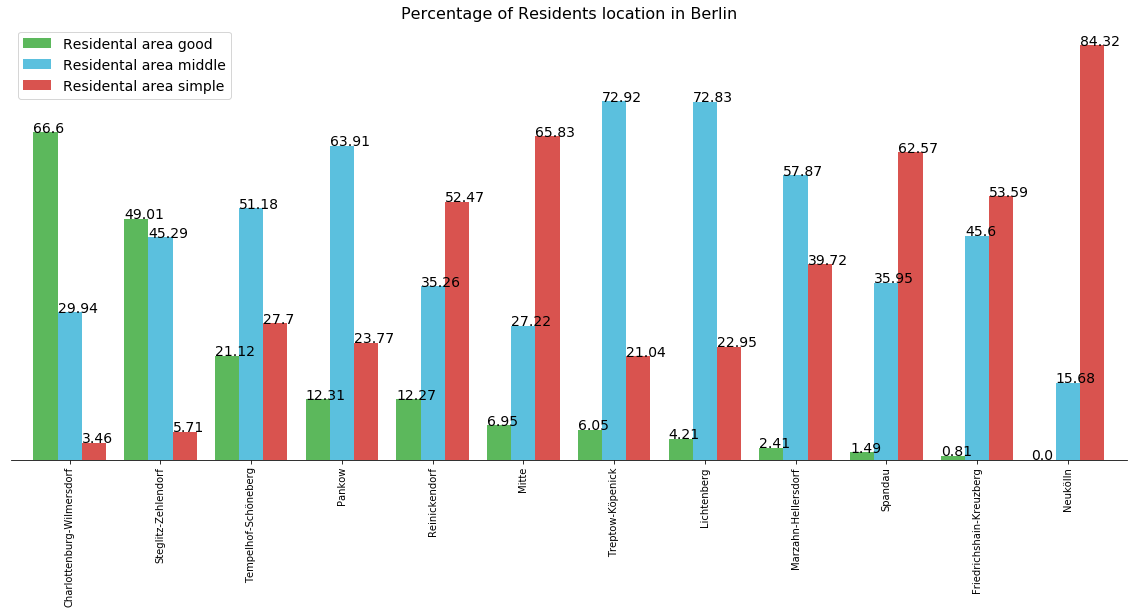

In [14]:
Borough = df_Anteile2['Bezirk']
ax = df_Anteile2.plot(kind='bar',figsize=(20,8),width=0.8,color=['#5cb85c','#5bc0de','#d9534f']) 
ax.set_xticklabels(Borough) 
ax.set_ylabel("Interest Level In %",fontsize=14) 
ax.set_title("Percentage of Residents location in Berlin",fontsize=16) 
ax.legend(fontsize=14)

ax.spines['top'].set_visible(False) #hide top
ax.spines['right'].set_visible(False) #hide right
ax.spines['left'].set_visible(False) #hide left
ax.axes.get_yaxis().set_visible(False) #hide y-axis numbers

#eigentlich ist nur diese Schleife für dich interessant! Beschriftung der Balken
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),size=14)

In [13]:
df6=df_bln[['Bezirk','Rental Price']].sort_values(['Rental Price'], ascending= [False])
df6= df6.reset_index(drop=True)
df6

,Bezirk,Rental Price
0,Friedrichshain-Kreuzberg,11.91
1,Mitte,11.83
2,Charlottenburg-Wilmersdorf,11.23
3,Pankow,10.06
4,Neukölln,9.83
5,Steglitz-Zehlendorf,9.80
6,Tempelhof-Schöneberg,9.70
7,Lichtenberg,9.10
8,Treptow-Köpenick,8.98
9,Reinickendorf,8.62


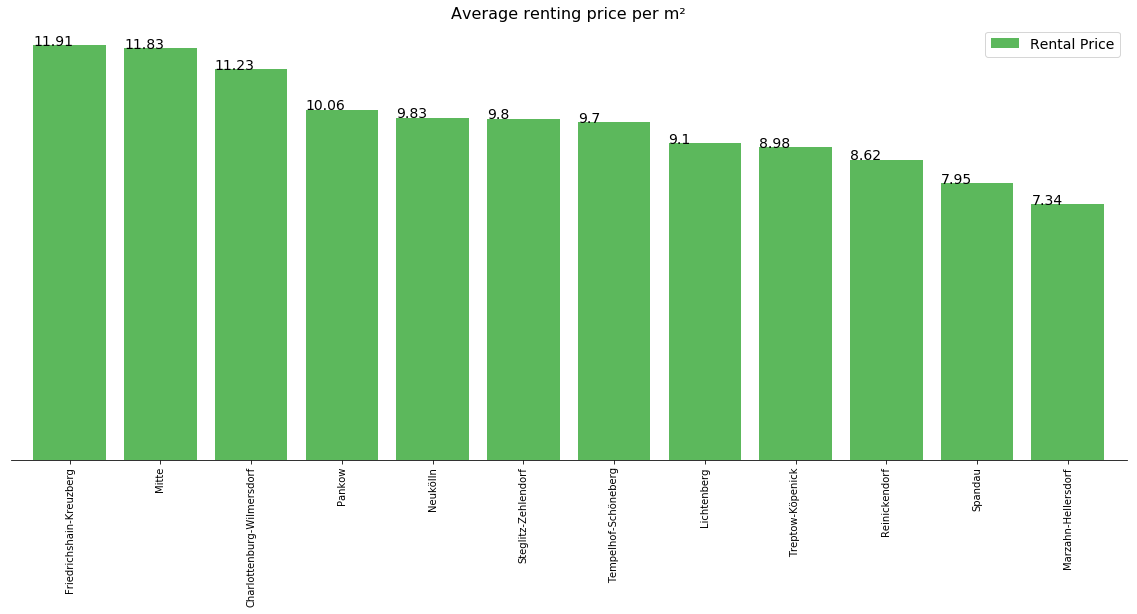

In [16]:
Borough =df6['Bezirk']
ax = df6.plot(kind='bar',figsize=(20,8),width=0.8,color=['#5cb85c']) 
ax.set_xticklabels(Borough) 
ax.set_ylabel("Interest Level In %",fontsize=14) 
ax.set_title("Average renting price per m²",fontsize=16) 
ax.legend(fontsize=14)

ax.spines['top'].set_visible(False) #hide top
ax.spines['right'].set_visible(False) #hide right
ax.spines['left'].set_visible(False) #hide left
ax.axes.get_yaxis().set_visible(False) #hide y-axis numbers

#eigentlich ist nur diese Schleife für dich interessant! Beschriftung der Balken
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),size=14)

In [17]:
df_neu=df_bln.drop(df_bln.columns[[1,2,3,4]], axis=1)
df_neu=pd.merge(df_neu,df_Anteile2, on ='Bezirk', how='left')
df_gesamt=pd.merge(df_neu, df6, on ='Bezirk', how='left')
df_gesamt

,Bezirk,Population density,No. housing builings,Living space total,Living space per Person,TotalDistanz,Residental area good,Residental area middle,Residental area simple,Rental Price
0,Mitte,9368,13230,13242,36.6,0.014169,6.95,27.22,65.83,11.83
1,Friedrichshain-Kreuzberg,13461,9661,10457,38.5,0.074482,0.81,45.60,53.59,11.91
2,Pankow,3833,36993,15743,40.2,0.128118,12.31,63.91,23.77,10.06
3,Charlottenburg-Wilmersdorf,4895,17928,14518,46.2,0.134089,66.60,29.94,3.46,11.23
4,Spandau,2584,27963,8820,37.5,0.195652,1.49,35.95,62.57,7.95
5,Steglitz-Zehlendorf,2851,40621,13441,46.3,0.246717,49.01,45.29,5.71,9.80
6,Tempelhof-Schöneberg,6420,28586,13604,40.2,0.091590,21.12,51.18,27.70,9.70
7,Neukölln,7122,27982,11411,35.9,0.082377,0.00,15.68,84.32,9.83
8,Treptow-Köpenick,1561,37405,10278,40.0,0.310468,6.05,72.92,21.04,8.98
9,Marzahn-Hellersdorf,4250,31488,9751,37.7,0.204289,2.41,57.87,39.72,7.34


In [18]:
# looking vor amount of venues as explanatory variable for renting price using Foursquare data

CLIENT_ID = '2KYL50Q5YBLRHHTDLMVMBWLYSVJCLLGKDPLKQ2SPGUS2UPJB' # your Foursquare ID
CLIENT_SECRET = '1BVMYJJWSSZSIBTGLB1Z5VAMU2ACT3F2XSU0RZW2UFCQVUXZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
 

bln_latitude = 52.515306 # neighborhood latitude value
bln_longitude = 13.461612 # neighborhood longitude value
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius= 50000 # define radius

Your credentails:
CLIENT_ID: 2KYL50Q5YBLRHHTDLMVMBWLYSVJCLLGKDPLKQ2SPGUS2UPJB
CLIENT_SECRET:1BVMYJJWSSZSIBTGLB1Z5VAMU2ACT3F2XSU0RZW2UFCQVUXZ


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Bezirk', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:

berlin_venues = getNearbyVenues(names=berlin_data['Bezirk'],
                                   latitudes=berlin_data['Latitude'],
                                   longitudes=berlin_data['Longitude']
                                  )
berlin_venues.head()

Mitte
Friedrichshain-Kreuzberg
Pankow
Charlottenburg-Wilmersdorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schöneberg
Neukölln
Treptow-Köpenick
Marzahn-Hellersdorf
Lichtenberg
Reinickendorf


,Bezirk,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.51769,13.402376,Lustgarten,52.518469,13.399454,Garden
1,Mitte,52.51769,13.402376,Radisson Blu,52.519623,13.402488,Hotel
2,Mitte,52.51769,13.402376,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
3,Mitte,52.51769,13.402376,Atrium Lobby Lounge & Bar,52.519597,13.402774,Hotel Bar
4,Mitte,52.51769,13.402376,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum


In [21]:
dfvenues=berlin_venues.groupby('Bezirk').count()
dfvenues= dfvenues.reset_index(drop=False)
df= dfvenues.drop(dfvenues.columns[[1,2,4,5,6]], axis=1)
df

,Bezirk,Venue
0,Charlottenburg-Wilmersdorf,10
1,Friedrichshain-Kreuzberg,100
2,Lichtenberg,6
3,Marzahn-Hellersdorf,11
4,Mitte,59
5,Neukölln,80
6,Pankow,4
7,Reinickendorf,4
8,Spandau,8
9,Steglitz-Zehlendorf,7


In [22]:
print('There are {} uniques categories.'.format(len(berlin_venues['Venue Category'].unique())))

There are 118 uniques categories.


In [23]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhood'] = berlin_venues['Bezirk'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
manhattan_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Café,Cheese Shop,Climbing Gym,Cocktail Bar,Coffee Shop,Concert Hall,Costume Shop,Cupcake Shop,Dessert Shop,Dive Bar,Doner Restaurant,Drugstore,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Go Kart Track,Gourmet Shop,Grocery Store,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Industrial Estate,Inn,Insurance Office,Italian Restaurant,Japanese Restaurant,Jazz Club,Korean Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Motorcycle Shop,Movie Theater,Museum,Nature Preserve,Neighborhood,Nightclub,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Pet Store,Piercing Parlor,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Ramen Restaurant,Restaurant,Road,Salad Place,Scenic Lookout,Shopping Mall,South American Restaurant,Sports Bar,Sri Lankan Restaurant,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Winery,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
berlin_onehot.shape

(301, 118)

In [25]:
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped

,Neighborhood,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Café,Cheese Shop,Climbing Gym,Cocktail Bar,Coffee Shop,Concert Hall,Costume Shop,Cupcake Shop,Dessert Shop,Dive Bar,Doner Restaurant,Drugstore,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Go Kart Track,Gourmet Shop,Grocery Store,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Industrial Estate,Inn,Insurance Office,Italian Restaurant,Japanese Restaurant,Jazz Club,Korean Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Motorcycle Shop,Movie Theater,Museum,Nature Preserve,Nightclub,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Pet Store,Piercing Parlor,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Ramen Restaurant,Restaurant,Road,Salad Place,Scenic Lookout,Shopping Mall,South American Restaurant,Sports Bar,Sri Lankan Restaurant,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Winery,Yoga Studio
0,Charlottenburg-Wilmersdorf,0.000,0.000000,0.000000,0.00,0.0000,0.000,0.00,0.00,0.0000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.0000,0.100000,0.100000,0.0000,0.000,0.000,0.00,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.1,0.000000,0.000000,0.00,0.00,0.0000,0.000000,0.00,0.0000,0.000000,0.000000,0.10,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.100000,0.000000,0.000000,0.10,0.0000,0.000,0.000000,0.00,0.200000,0.000000,0.0000,0.00,0.0,0.000,0.1,0.000000,0.00,0.000000,0.00,0.000,0.0000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000,0.0000,0.000,0.00,0.1000,0.00,0.000000,0.000000,0.00,0.000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0000,0.000000,0.0000,0.0000,0.00,0.00,0.000000,0.0000,0.000000,0.00,0.0000,0.000000,0.000000,0.0000,0.00,0.0000
1,Friedrichshain-Kreuzberg,0.000,0.000000,0.000000,0.01,0.0400,0.110,0.00,0.02,0.0000,0.01,0.000,0.000000,0.020000,0.000000,0.000000,0.0100,0.000000,0.110000,0.0000,0.000,0.010,0.01,0.000000,0.000000,0.000000,0.0100,0.0100,0.010000,0.020000,0.0,0.000000,0.000000,0.02,0.01,0.0100,0.000000,0.01,0.0000,0.000000,0.000000,0.00,0.0000,0.0000,0.010000,0.0000,0.010000,0.000,0.01,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.020000,0.000000,0.020000,0.03,0.0100,0.000,0.000000,0.00,0.040000,0.000000,0.0000,0.01,0.0,0.000,0.0,0.000000,0.02,0.000000,0.00,0.000,0.0000,0.000000,0.00,0.000000,0.0100,0.000000,0.000000,0.010,0.0000,0.000,0.01,0.0600,0.01,0.000000,0.000000,0.01,0.020,0.01,0.010000,0.01,0.000000,0.000000,0.000000,0.01,0.01,0.01,0.000000,0.0000,0.000000,0.0200,0.0100,0.02,0.04,0.000000,0.0000,0.000000,0.00,0.0000,0.030000,0.030000,0.0000,0.01,0.0100
2,Lichtenberg,0.000,0.000000,0.000000,0.00,0.0000,0.000,0.00,0.00,0.0000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.166667,0.0000,0.000,0.000,0.00,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0000,0.000000,0.00,0.0000,0.333333,0.000000,0.00,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.00,0.166667,0.000000,0.000000,0.000000,0.00,0.166667,0.166667,0.000000,0.000000,0.00,0.0000,0.000,0.000000,0.00,0.000000,0.000000,0.0000,0.00,0.0,0.000,0.0,0.000000,0.00,0.000000,0.00,0.000,0.0000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000,0.0000,0.000,0.00,0.0000,0.00,0.000000,0.000000,0.00,0.000,0.00,0.00

In [26]:
berlin_grouped.shape

(12, 118)

In [30]:
num_top_venues = 10

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlottenburg-Wilmersdorf----
                venue  freq
0  Italian Restaurant   0.2
1            Bus Stop   0.1
2               Hotel   0.1
3         Gas Station   0.1
4  Light Rail Station   0.1
5                Café   0.1
6         Pizza Place   0.1
7   Indian Restaurant   0.1
8   Electronics Store   0.1
9     Piercing Parlor   0.0


----Friedrichshain-Kreuzberg----
                           venue  freq
0                            Bar  0.11
1                           Café  0.11
2                    Pizza Place  0.06
3             Italian Restaurant  0.04
4                         Bakery  0.04
5                Thai Restaurant  0.04
6          Vietnamese Restaurant  0.03
7  Vegetarian / Vegan Restaurant  0.03
8              Indian Restaurant  0.03
9                          Hotel  0.02


----Lichtenberg----
                    venue  freq
0  Furniture / Home Store  0.33
1           Hot Dog Joint  0.17
2          Hardware Store  0.17
3                   Hotel  0.17
4          

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Italian Restaurant,Electronics Store,Bus Stop,Hotel,Light Rail Station,Gas Station,Pizza Place,Café,Indian Restaurant,Beer Garden
1,Friedrichshain-Kreuzberg,Café,Bar,Pizza Place,Bakery,Italian Restaurant,Thai Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Mediterranean Restaurant
2,Lichtenberg,Furniture / Home Store,Hotel,Hot Dog Joint,Hardware Store,Café,Yoga Studio,Gastropub,Exhibit,Falafel Restaurant,Farmers Market
3,Marzahn-Hellersdorf,Supermarket,Drugstore,Doner Restaurant,Shopping Mall,Plaza,Pool,Trail,Metro Station,Fountain,Fried Chicken Joint
4,Mitte,German Restaurant,History Museum,Museum,Hotel,Café,Fountain,Art Gallery,Art Museum,Historic Site,Concert Hall
5,Neukölln,Bar,Café,Middle Eastern Restaurant,Coffee Shop,Food & Drink Shop,Dive Bar,Italian Restaurant,Pub,Cocktail Bar,Supermarket
6,Pankow,Gas Station,Asian Restaurant,Turkish Restaurant,Tram Station,Yoga Studio,Fountain,Garden,Furniture / Home Store,Fried Chicken Joint,French Restaurant
7,Reinickendorf,Insurance Office,Hostel,Food & Drink Shop,Nature Preserve,Yoga Studio,Gastropub,Exhibit,Falafel Restaurant,Farmers Market,Fountain
8,Spandau,Bus Stop,Argentinian Restaurant,Supermarket,Plaza,Park,Cocktail Bar,Pizza Place,Hardware Store,Fried Chicken Joint,Event Space
9,Steglitz-Zehlendorf,Italian Restaurant,Bus Stop,History Museum,Liquor Store,Yoga Studio,Exhibit,Falafel Restaurant,Farmers Market,Food & Drink Shop,Fountain


In [48]:
dfvenues2=pd.merge(df,df_gesamt, on ='Bezirk', how='left')
dfvenues2

,Bezirk,Venue,Population density,No. housing builings,Living space total,Living space per Person,TotalDistanz,Residental area good,Residental area middle,Residental area simple,Rental Price
0,Charlottenburg-Wilmersdorf,10,4895,17928,14518,46.2,0.134089,66.60,29.94,3.46,11.23
1,Friedrichshain-Kreuzberg,100,13461,9661,10457,38.5,0.074482,0.81,45.60,53.59,11.91
2,Lichtenberg,6,5446,17123,10079,35.9,0.138157,4.21,72.83,22.95,9.10
3,Marzahn-Hellersdorf,11,4250,31488,9751,37.7,0.204289,2.41,57.87,39.72,7.34
4,Mitte,59,9368,13230,13242,36.6,0.014169,6.95,27.22,65.83,11.83
5,Neukölln,80,7122,27982,11411,35.9,0.082377,0.00,15.68,84.32,9.83
6,Pankow,4,3833,36993,15743,40.2,0.128118,12.31,63.91,23.77,10.06
7,Reinickendorf,4,2897,35701,10137,39.4,0.181299,12.27,35.26,52.47,8.62
8,Spandau,8,2584,27963,8820,37.5,0.195652,1.49,35.95,62.57,7.95
9,Steglitz-Zehlendorf,7,2851,40621,13441,46.3,0.246717,49.01,45.29,5.71,9.80


In [49]:
dfvenues2.describe()

,Venue,Population density,No. housing builings,Living space total,Living space per Person,TotalDistanz,Residental area good,Residental area middle,Residental area simple,Rental Price
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,25.083333,5390.666667,27056.750000,11790.083333,39.533333,0.150117,15.269167,46.137500,38.594167,9.695833
std,34.129322,3360.123113,10286.725056,2216.424617,3.502294,0.082089,21.104130,18.289924,25.286126,1.433213
min,4.000000,1561.000000,9661.000000,8820.000000,35.900000,0.014169,0.000000,15.680000,3.460000,7.340000
25%,5.500000,2885.500000,17726.750000,10122.500000,37.275000,0.089286,2.180000,33.930000,22.472500,8.890000
50%,8.000000,4572.500000,28284.000000,10934.000000,38.950000,0.136123,6.500000,45.445000,33.710000,9.750000
75%,23.000000,6595.500000,36024.000000,13481.750000,40.200000,0.197811,14.512500,59.380000,55.835000,10.352500
max,100.000000,13461.000000,40621.000000,15743.000000,46.300000,0.310468,66.600000,72.920000,84.320000,11.910000


In [50]:
dfvenues2.corr()

,Venue,Population density,No. housing builings,Living space total,Living space per Person,TotalDistanz,Residental area good,Residental area middle,Residental area simple,Rental Price
Venue,1.000000,0.871613,-0.609376,-0.093656,-0.381745,-0.629157,-0.345922,-0.493942,0.645972,0.604029
Population density,0.871613,1.000000,-0.807294,0.061097,-0.316695,-0.795569,-0.232298,-0.300848,0.411406,0.716964
No. housing builings,-0.609376,-0.807294,1.000000,0.070332,0.311747,0.711651,0.100550,0.253256,-0.267018,-0.614642
Living space total,-0.093656,0.061097,0.070332,1.000000,0.552851,-0.333518,0.607536,-0.096976,-0.436995,0.565772
Living space per Person,-0.381745,-0.316695,0.311747,0.552851,1.000000,0.359969,0.928785,-0.022179,-0.759049,0.217073
TotalDistanz,-0.629157,-0.795569,0.711651,-0.333518,0.359969,1.000000,0.139301,0.482890,-0.465399,-0.647366
Residental area good,-0.345922,-0.232298,0.100550,0.607536,0.928785,0.139301,1.000000,-0.182030,-0.702905,0.301036
Residental area middle,-0.493942,-0.300848,0.253256,-0.096976,-0.022179,0.482890,-0.182030,1.000000,-0.571450,-0.337518
Residental area simple,0.645972,0.411406,-0.267018,-0.436995,-0.759049,-0.465399,-0.702905,-0.571450,1.000000,-0.007169
Rental Price,0.604029,0.716964,-0.614642,0.565772,0.217073,-0.647366,0.301036,-0.337518,-0.007169,1.000000


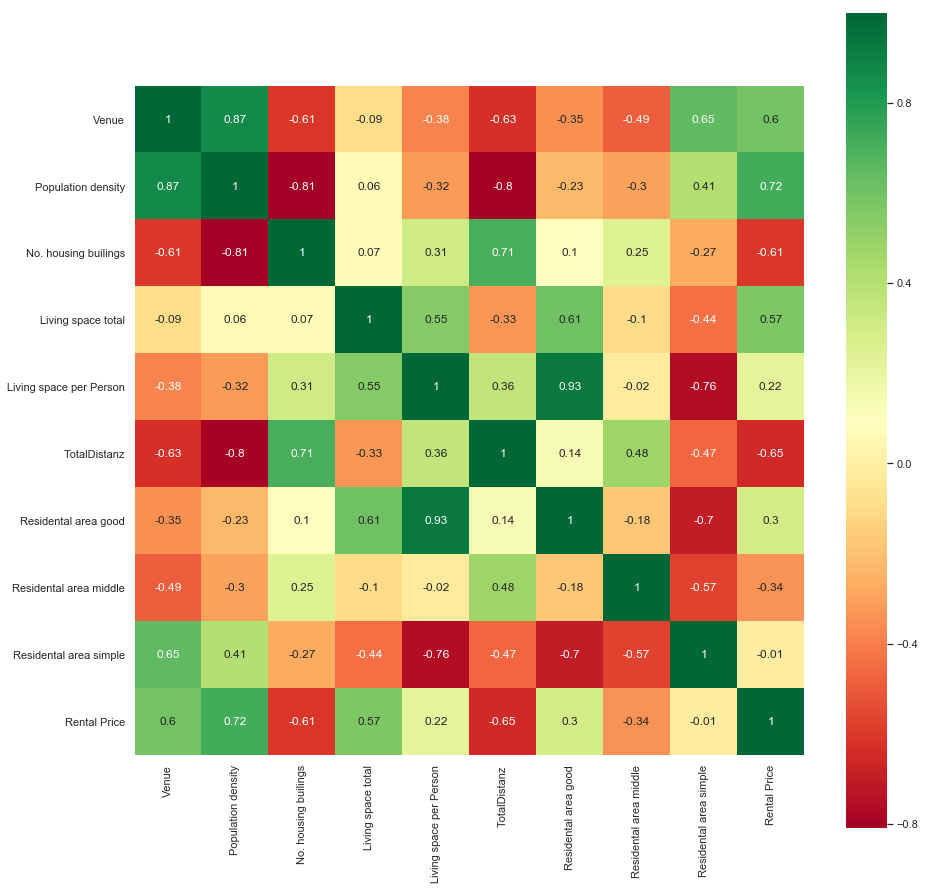

In [54]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(dfvenues2.corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [61]:
dfreg=dfvenues2.drop(dfvenues2.columns[[0,5,7,8,9]], axis=1)
dfreg

,Venue,Population density,No. housing builings,Living space total,TotalDistanz,Rental Price
0,10,4895,17928,14518,0.134089,11.23
1,100,13461,9661,10457,0.074482,11.91
2,6,5446,17123,10079,0.138157,9.10
3,11,4250,31488,9751,0.204289,7.34
4,59,9368,13230,13242,0.014169,11.83
5,80,7122,27982,11411,0.082377,9.83
6,4,3833,36993,15743,0.128118,10.06
7,4,2897,35701,10137,0.181299,8.62
8,8,2584,27963,8820,0.195652,7.95
9,7,2851,40621,13441,0.246717,9.80


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(dfreg)
# scaled_data
lm = LinearRegression()
lm

Y = dfreg['Rental Price']
X = dfreg.drop(['Rental Price'],1).values
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
lm.intercept_

4.057274018886609

In [64]:
lm.coef_

array([ 2.19083196e-02,  2.96047221e-05, -8.41350337e-05,  5.15239543e-04,
        7.53504401e+00])

In [66]:
r_squared = lm.score(X,Y)
print("R²: {}".format(r_squared))

R²: 0.9074712863841258


(0, 14.096254297523204)

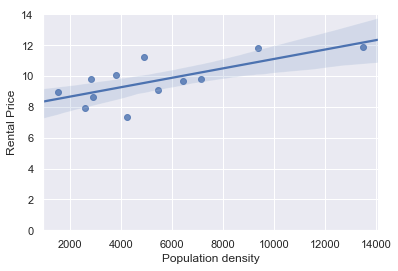

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.regplot(x="Population density", y="Rental Price", data=dfvenues2)
plt.ylim(0,)

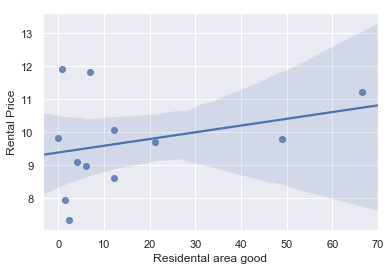

In [239]:
sns.regplot(x="Residental area good", y="Rental Price", data=dfvenues2)

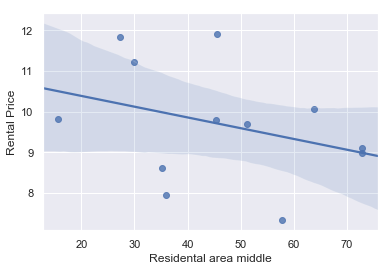

In [198]:
sns.regplot(x="Residental area middle", y="Rental Price", data=dfvenues2)

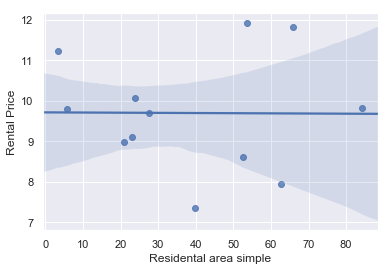

In [199]:
sns.regplot(x="Residental area simple", y="Rental Price", data=dfvenues2)

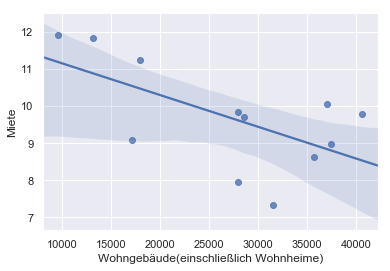

In [120]:
sns.regplot(x="Population density", y="Rental Price", data=dfvenues2)

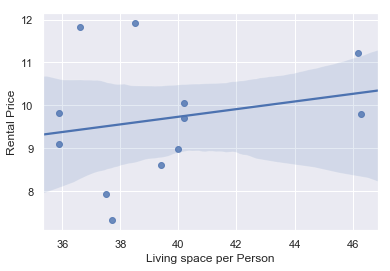

In [200]:
sns.regplot(x="Living space per Person", y="Rental Price", data=dfvenues2)

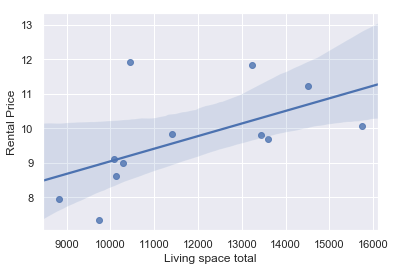

In [201]:
sns.regplot(x="Living space total", y="Rental Price", data=dfvenues2)

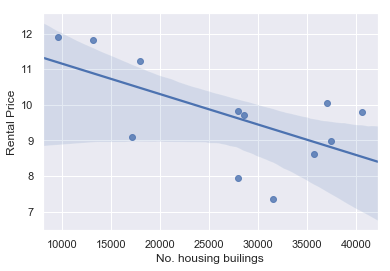

In [202]:
sns.regplot(x="No. housing builings", y="Rental Price", data=dfvenues2)

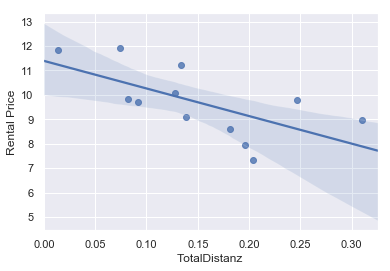

In [240]:
sns.regplot(x="TotalDistanz", y="Rental Price", data=dfvenues2)

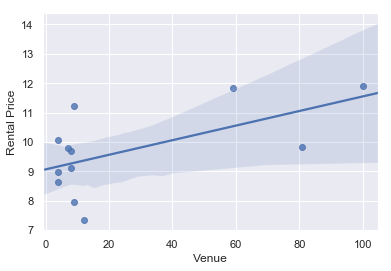

In [204]:
sns.regplot(x="Venue", y="Rental Price", data=dfvenues2)

In [241]:
num_top_venues = 5

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlottenburg-Wilmersdorf----
                venue  freq
0  Italian Restaurant  0.22
1         Pizza Place  0.11
2                Café  0.11
3         Gas Station  0.11
4  Light Rail Station  0.11


----Friedrichshain-Kreuzberg----
             venue  freq
0             Café  0.11
1              Bar  0.11
2      Pizza Place  0.06
3           Bakery  0.04
4  Thai Restaurant  0.04


----Lichtenberg----
                    venue  freq
0  Furniture / Home Store  0.25
1               Cafeteria  0.12
2          Hardware Store  0.12
3                   Hotel  0.12
4           Hot Dog Joint  0.12


----Marzahn-Hellersdorf----
           venue  freq
0    Supermarket  0.33
1            ATM  0.08
2          Trail  0.08
3  Metro Station  0.08
4          Plaza  0.08


----Mitte----
               venue  freq
0  German Restaurant  0.10
1              Hotel  0.07
2     History Museum  0.07
3             Museum  0.07
4               Café  0.05


----Neukölln----
                       venue  fre

Cluster Neighbourhoods

array([0, 0, 0, 0, 0, 0, 2, 3, 0, 4, 0, 1])

In [242]:
berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

sum_squared_distance = []
k = range(1,10)
for i in k:
    km= KMeans(n_clusters=i, random_state = 0).fit(berlin_grouped_clustering)
    sum_squared_distance.append(km.inertia_)
sum_squared_distance  

[1.721617226330139,
 1.3559453655238822,
 1.0842710119852463,
 0.8521529597153032,
 0.6346570754457832,
 0.4893554853105599,
 0.3556114148152264,
 0.2325565752973191,
 0.13505225829104023]

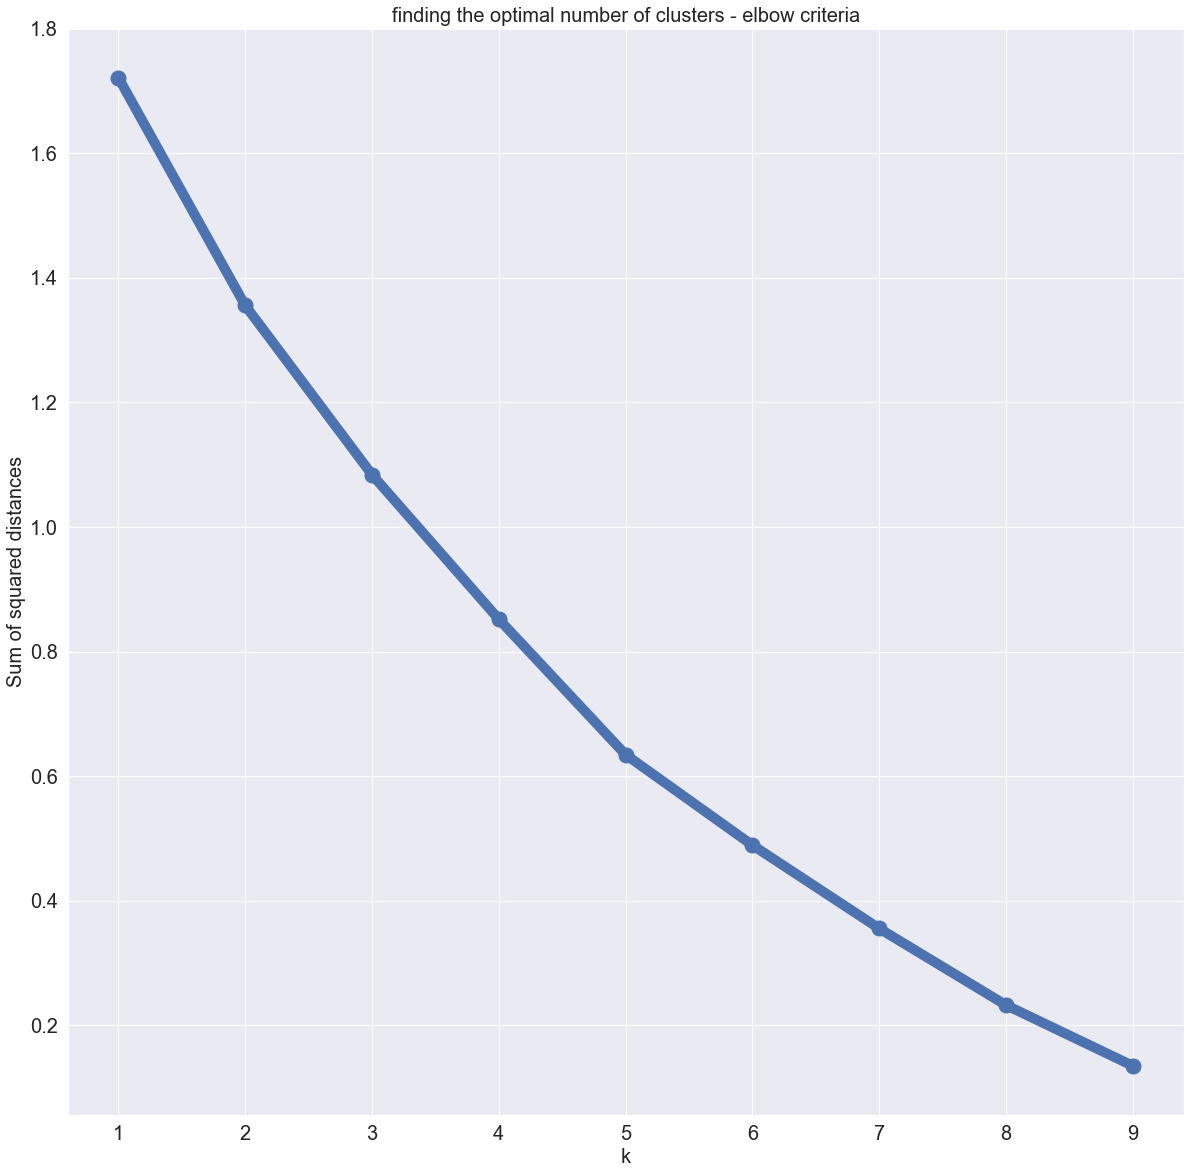

In [136]:
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

matplotlib.rc('axes', titlesize=20, labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
plt.figure(figsize=(20,20))
plt.plot(k, sum_squared_distance, 'o-', linewidth = 10, markersize = 15)
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('finding the optimal number of clusters - elbow criteria')
plt.show()

In [138]:
# set number of clusters
kclusters = 5

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([0, 0, 0, 0, 0, 0, 2, 3, 0, 4, 0, 1])

In [139]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = berlin_data

# merge berlin_grouped with berlin_data to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Bezirk')

berlin_merged.head() # check the last columns!

,Bezirk,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,52.517690,13.402376,0,German Restaurant,History Museum,Hotel,Museum,Café,Historic Site,Concert Hall,Art Gallery,Art Museum,Fountain
1,Friedrichshain-Kreuzberg,52.515306,13.461612,0,Café,Bar,Pizza Place,Italian Restaurant,Bakery,Thai Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Ice Cream Shop
2,Pankow,52.597663,13.436351,2,Turkish Restaurant,Tram Station,Asian Restaurant,Gas Station,Yoga Studio,Food & Drink Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Fountain
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,0,Italian Restaurant,Pizza Place,Bus Stop,Indian Restaurant,Light Rail Station,Gas Station,Café,Hotel,Beach,German Restaurant
4,Spandau,52.519267,13.195439,0,Pizza Place,Halal Restaurant,Plaza,Credit Union,Convenience Store,Cocktail Bar,Bus Stop,Park,Argentinian Restaurant,Hardware Store


In [140]:
# create map of Berlin using latitude and longitude values
map_clusters = folium.Map(location=[52.501408, 13.4023285], zoom_start=12)
map_clusters

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Bezirk'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [141]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[0] + list(range(4, berlin_merged.shape[1]))]]

,Bezirk,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,German Restaurant,History Museum,Hotel,Museum,Café,Historic Site,Concert Hall,Art Gallery,Art Museum,Fountain
1,Friedrichshain-Kreuzberg,Café,Bar,Pizza Place,Italian Restaurant,Bakery,Thai Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Ice Cream Shop
3,Charlottenburg-Wilmersdorf,Italian Restaurant,Pizza Place,Bus Stop,Indian Restaurant,Light Rail Station,Gas Station,Café,Hotel,Beach,German Restaurant
4,Spandau,Pizza Place,Halal Restaurant,Plaza,Credit Union,Convenience Store,Cocktail Bar,Bus Stop,Park,Argentinian Restaurant,Hardware Store
6,Tempelhof-Schöneberg,Grocery Store,Food & Drink Shop,Pet Store,Supermarket,Motorcycle Shop,Climbing Gym,Brewery,Industrial Estate,Farmers Market,Falafel Restaurant
7,Neukölln,Bar,Café,Middle Eastern Restaurant,Coffee Shop,Food & Drink Shop,Pub,Dive Bar,Italian Restaurant,Cocktail Bar,Supermarket
9,Marzahn-Hellersdorf,Supermarket,ATM,Doner Restaurant,Drugstore,Shopping Mall,Plaza,Bus Stop,Trail,Metro Station,Fountain
10,Lichtenberg,Furniture / Home Store,Tram Station,Cafeteria,Café,Hotel,Hot Dog Joint,Hardware Store,Exhibit,Event Space,Falafel Restaurant


In [142]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[0] + list(range(4, berlin_merged.shape[1]))]]

,Bezirk,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Treptow-Köpenick,Lake,Beach,Beer Garden,French Restaurant,Gas Station,Garden,Furniture / Home Store,Fried Chicken Joint,Yoga Studio,General Entertainment


In [143]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[0] + list(range(4, berlin_merged.shape[1]))]]

,Bezirk,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Pankow,Turkish Restaurant,Tram Station,Asian Restaurant,Gas Station,Yoga Studio,Food & Drink Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Fountain


In [144]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 3, berlin_merged.columns[[0] + list(range(4, berlin_merged.shape[1]))]]

,Bezirk,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Reinickendorf,Hostel,Insurance Office,Food & Drink Shop,Nature Preserve,Yoga Studio,Gas Station,Drugstore,Event Space,Exhibit,Falafel Restaurant


In [145]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 4, berlin_merged.columns[[0] + list(range(4, berlin_merged.shape[1]))]]

,Bezirk,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Steglitz-Zehlendorf,Italian Restaurant,Bus Stop,Liquor Store,History Museum,Fountain,Garden,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Yoga Studio


In [146]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 5, berlin_merged.columns[[0] + list(range(4, berlin_merged.shape[1]))]]

,Bezirk,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
